<a href="https://colab.research.google.com/github/jordantcarlisle/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare, t
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [3]:
votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=column_headers, na_values="?")
votes.sample(10)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
109,democrat,y,NaN,y,n,n,n,y,y,y,n,n,n,n,n,y,NaN
341,democrat,n,NaN,y,NaN,n,y,y,y,y,y,y,n,NaN,NaN,y,y
398,democrat,n,y,y,n,y,y,n,y,n,n,n,n,n,n,n,y
71,republican,y,y,y,y,n,n,y,y,y,y,y,n,n,y,n,y
97,democrat,y,n,n,n,y,y,y,n,n,y,y,n,n,y,n,y
203,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
237,democrat,y,n,y,n,n,y,y,y,n,n,n,y,y,n,n,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
302,republican,n,n,n,y,y,y,y,n,n,y,n,y,y,y,n,y
417,democrat,y,y,y,n,n,n,y,y,y,y,y,n,y,n,n,y


In [4]:
votes = votes.replace({'y': 1, 'n': 0})
votes.sample(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
38,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
229,republican,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
320,democrat,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
324,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [5]:
votes.sum()

party                   republicanrepublicandemocratdemocratdemocratde...
handicapped-infants                                                   187
water-project                                                         195
budget                                                                253
physician-fee-freeze                                                  177
el-salvador-aid                                                       212
religious-groups                                                      272
anti-satellite-ban                                                    239
aid-to-contras                                                        242
mx-missile                                                            207
immigration                                                           216
synfuels                                                              150
education                                                             171
right-to-sue                          

In [0]:
votes = votes.dropna()

In [7]:
votes.sample(4)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
78,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
241,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
63,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
184,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [8]:
#exploring to see how much data was excluded by comparing the previous data frame summary
# I'm not sure if it matters, but this eliminated quite a few observations. I'm not sure if we convered the standard protocol when faced with this situation
votes.sum()

party                   democratrepublicandemocratdemocratdemocratdemo...
handicapped-infants                                                    96
water-project                                                         107
budget                                                                123
physician-fee-freeze                                                  113
el-salvador-aid                                                       128
religious-groups                                                      149
anti-satellite-ban                                                    124
aid-to-contras                                                        119
mx-missile                                                            113
immigration                                                           128
synfuels                                                               80
education                                                             108
right-to-sue                          

In [9]:
votes.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [0]:
# I will need to filter with this. 
dems = votes[votes['party'] == 'democrat']
reps = votes[votes['party'] == 'republican']

In [11]:
#Looking for issues that have a difference between democrat and republican
print(dems.sum())
print(reps.sum())

party                   democratdemocratdemocratdemocratdemocratdemocr...
handicapped-infants                                                    73
water-project                                                          56
budget                                                                106
physician-fee-freeze                                                    6
el-salvador-aid                                                        25
religious-groups                                                       55
anti-satellite-ban                                                     95
aid-to-contras                                                        103
mx-missile                                                             98
immigration                                                            66
synfuels                                                               63
education                                                              16
right-to-sue                          

In [0]:
d_religious = dems['religious-groups']
r_religious = reps['religious-groups']

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence)/ 2, n-1)
  return (mean, mean-moe, mean+moe)

In [14]:
confidence_interval(d_religious)

(0.4435483870967742, 0.3548790007497182, 0.5322177734438303)

In [15]:
confidence_interval(r_religious)

(0.8703703703703703, 0.8059979340740583, 0.9347428066666824)

##Explaining the confidence interval
The confidence intervale tells us that the sample mean is for each group and how likely a data point will fall within a standard deviation with 95% confidence. 

We can see that there is a lower average of republicans 44% who voted for regulation of religious groups in schools and that the probability of someone voting against it is between 35% and 53% with 95% confidence. Therefore 95% percent of the time the number of republicans voting for it will be between 35-53% and 44% on average. 

For democrats, 87% will vote for it and 95% of the time it will fall between 81-93% 

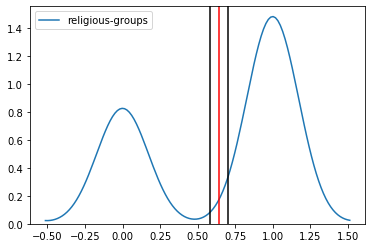

In [16]:
# Displaying population of the religious group votes. With this view, you can see that there is a two sided distribution, so the mean and variance are both between the mean of the subsets of republican and democratic votes. 
# I believe that this graphical represenation is a good way of showing polarization between parties.
sns.kdeplot(votes['religious-groups']);
ci = confidence_interval(votes['religious-groups'])
plt.axvline(x=ci[1], color='black'); # lower bound
plt.axvline(x=ci[2], color='black'); # upper bound
plt.axvline(x=ci[0], color='red'); # mean

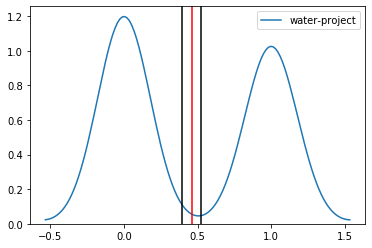

In [17]:
# If we look at an issue where both parties voted a similar number for the issue, the polarization will be smaller. 
# The distributions are similar, so both parties were more divided on the issue and we can see this in the height
sns.kdeplot(votes['water-project']);
ci = confidence_interval(votes['water-project'])
plt.axvline(x=ci[1], color='black'); # lower bound
plt.axvline(x=ci[2], color='black'); # upper bound
plt.axvline(x=ci[0], color='red'); # mean

### Chi-Squared

In [18]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [19]:
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third' })
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


In [26]:
contingency_table = pd.crosstab(df['Survived'], df['cabin_class'], margins=True)
contingency_table

cabin_class,first,second,third,All
Survived,,,,
0,64,90,270,424
1,120,83,85,288
All,184,173,355,712


In [0]:
row_sums = contingency_table.iloc[0:2, 3].values
col_sums = contingency_table.iloc[2, 0:3].values

In [32]:
row_sums

array([424, 288])

In [33]:
col_sums

array([184, 173, 355])

In [0]:
total = contingency_table.loc['All', 'All']

In [0]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)

In [36]:
expected = np.array(expected)
expected.shape

(2, 3)

In [37]:
expected

array([[109.57303371, 103.02247191, 211.40449438],
       [ 74.42696629,  69.97752809, 143.59550562]])

In [39]:
observed = pd.crosstab(df['Survived'], df['cabin_class']).values
print(observed.shape)
observed

(2, 3)


array([[ 64,  90, 270],
       [120,  83,  85]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()

In [41]:
chi_square

91.08074548791019

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

In [44]:
print(chi_squared, p_value, dof, expected)

91.08074548791019 1.6675060315554636e-20 2 [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


Null Hypothesis: Survival is independent of Class


*   Due to the p-value of 1.6675060315554636e-20, we REJECT the null hypothesis that Survival is independent of Class. Therefore, we can expect that survival was dependent upon passenger class. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)